<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Modelo_Arima_Garch_Series_De_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.0 MB/s eta 0:00:00


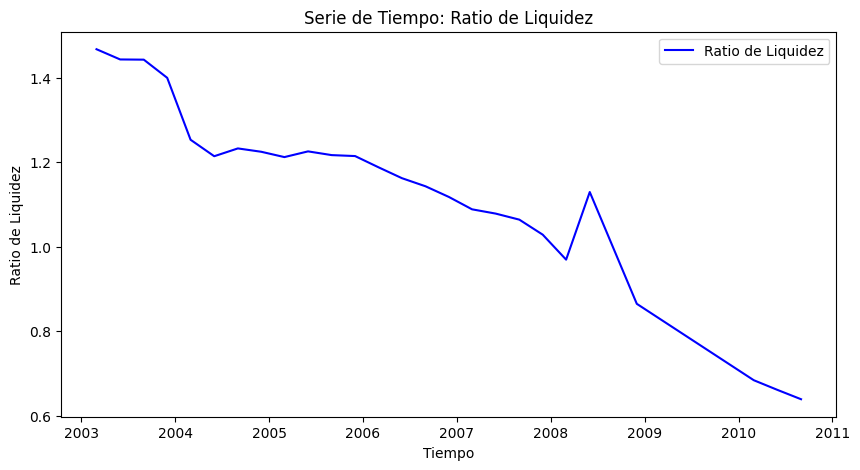

<Figure size 1000x500 with 0 Axes>

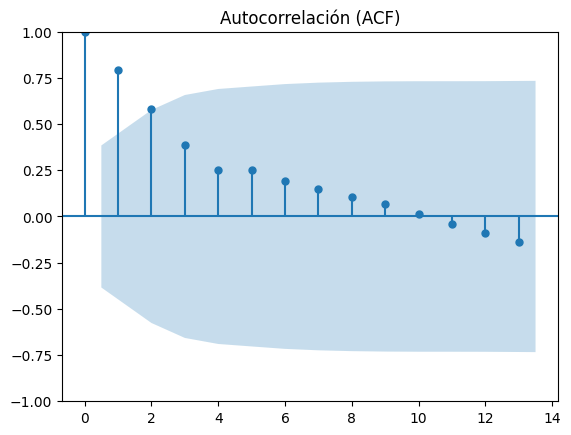

<Figure size 1000x500 with 0 Axes>

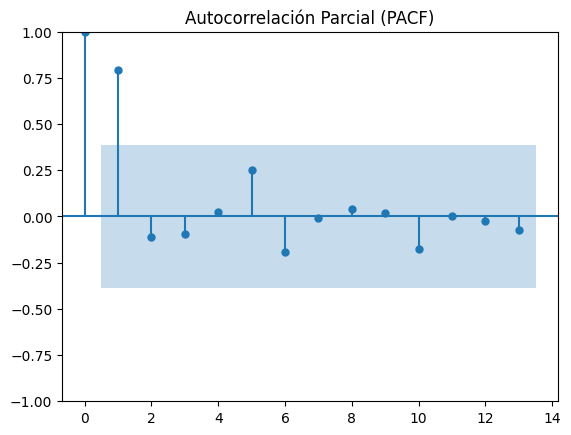

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

                               SARIMAX Results                                
Dep. Variable:      RATIO DE LIQUIDEZ   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  27.663
Date:                Thu, 16 Jan 2025   AIC                            -49.326
Time:                        07:00:05   BIC                            -45.670
Sample:                             0   HQIC                           -48.312
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5399      3.140     -0.172      0.863      -6.693       5.614
ma.L1          0.6639      2.955      0.225      0.822      -5.127       6.455
sigma2         0.0064      0.001      4.352      0.0

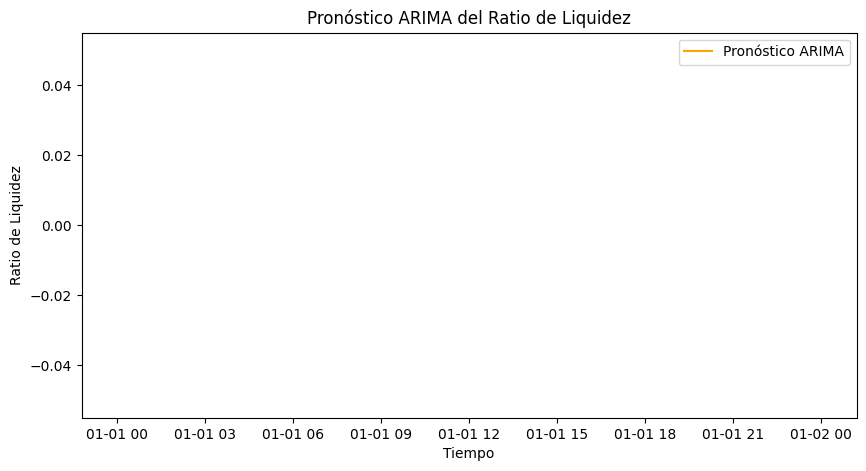

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04742. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:      RATIO DE LIQUIDEZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                20.1708
Distribution:                  Normal   AIC:                          -32.3416
Method:            Maximum Likelihood   BIC:                          -27.3092
                                        No. Observations:                   26
Date:                Thu, Jan 16 2025   Df Residuals:                       25
Time:                        07:00:05   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.2175  4.275e-03    284.764      0.000 [  1.209,  1.22

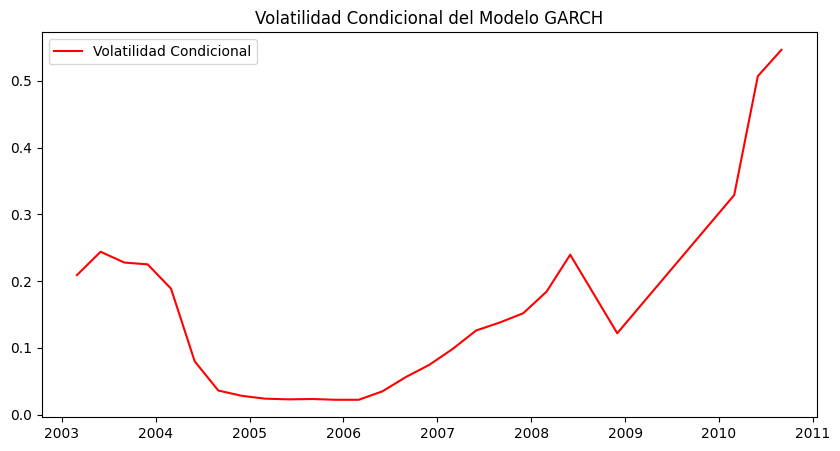

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04742. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:      RATIO DE LIQUIDEZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                19.5320
Distribution:                  Normal   AIC:                          -33.0641
Method:            Maximum Likelihood   BIC:                          -29.2898
                                        No. Observations:                   26
Date:                Thu, Jan 16 2025   Df Residuals:                       25
Time:                        07:00:06   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.2223  3.845e-03    317.927      0.000 [  1.215,  1.23

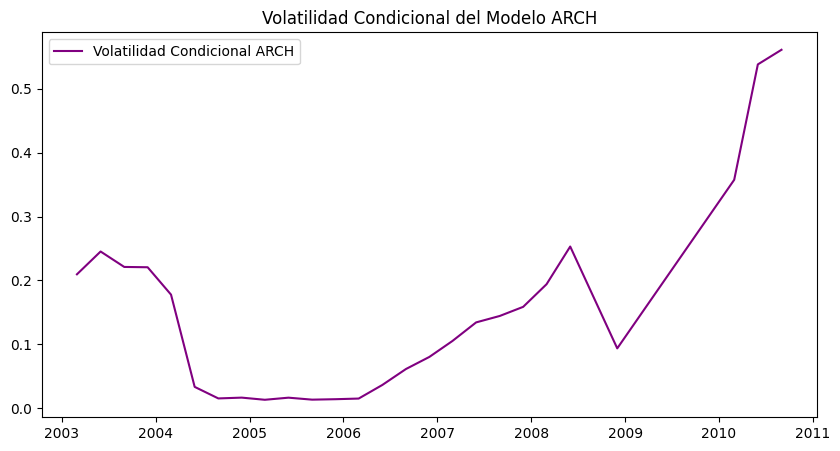

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar el archivo Excel
file_path = 'Mujer Empresarial.xlsx'  # Cambia esto por la ruta de tu archivo
data = pd.read_excel(file_path)

# Asegurarnos de que la columna PERIODO sea tratada como una serie temporal
data['PERIODO'] = pd.to_datetime(data['PERIODO'], format='%Y%m')
data.set_index('PERIODO', inplace=True)

# Seleccionar la variable dependiente: Ratio de Liquidez
liquidity_ratio = data['RATIO DE LIQUIDEZ']

# 1. Visualización de los datos
plt.figure(figsize=(10, 5))
plt.plot(liquidity_ratio, label='Ratio de Liquidez', color='blue')
plt.title('Serie de Tiempo: Ratio de Liquidez')
plt.xlabel('Tiempo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.show()

# Determinar el número máximo de lags permitido
max_lags = min(len(liquidity_ratio) // 2, 20)

# 2. Análisis de autocorrelación
plt.figure(figsize=(10, 5))
plot_acf(liquidity_ratio, lags=max_lags, title='Autocorrelación (ACF)')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(liquidity_ratio, lags=max_lags, title='Autocorrelación Parcial (PACF)')
plt.show()

# 3. Modelo ARIMA
# Determinación de órdenes (p, d, q) con base en el PACF y ACF
arima_model = ARIMA(liquidity_ratio, order=(1, 1, 1))
arima_result = arima_model.fit()

# Resumen del modelo ARIMA
print(arima_result.summary())

# Pronósticos del modelo ARIMA
forecast_steps = 12  # Número de períodos a pronosticar
forecast_arima = arima_result.forecast(steps=forecast_steps)

# Crear un índice temporal para los pronósticos
last_date = liquidity_ratio.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Crear una serie temporal con los pronósticos
forecast_arima_series = pd.Series(forecast_arima, index=forecast_index)

# Graficar los datos observados y el pronóstico
plt.figure(figsize=(10, 5))
#plt.plot(liquidity_ratio, label='Datos observados', color='blue')
plt.plot(forecast_arima_series, label='Pronóstico ARIMA', color='orange')
plt.title('Pronóstico ARIMA del Ratio de Liquidez')
plt.xlabel('Tiempo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.show()
# 4. Modelo GARCH
# Ajuste de un modelo GARCH(1, 1)
garch_model = arch_model(liquidity_ratio, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Resumen del modelo GARCH
print(garch_result.summary())

# Pronósticos del modelo GARCH
forecast_garch = garch_result.forecast(horizon=12)
conditional_volatility = forecast_garch.variance.iloc[-1]

plt.figure(figsize=(10, 5))
plt.plot(garch_result.conditional_volatility, label='Volatilidad Condicional', color='red')
plt.title('Volatilidad Condicional del Modelo GARCH')
plt.legend()
plt.show()

# 5. Modelo ARCH
arch_model_fit = arch_model(liquidity_ratio, vol='ARCH', p=1)
arch_result = arch_model_fit.fit(disp='off')

# Resumen del modelo ARCH
print(arch_result.summary())

# Visualización de volatilidad condicional del modelo ARCH
plt.figure(figsize=(10, 5))
plt.plot(arch_result.conditional_volatility, label='Volatilidad Condicional ARCH', color='purple')
plt.title('Volatilidad Condicional del Modelo ARCH')
plt.legend()
plt.show()


Columnas del archivo: Index(['PERIODO', 'IMOR', 'C. DE. C. VEN.', 'ROA', 'ROE', 'RATIO DE LIQUIDEZ',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


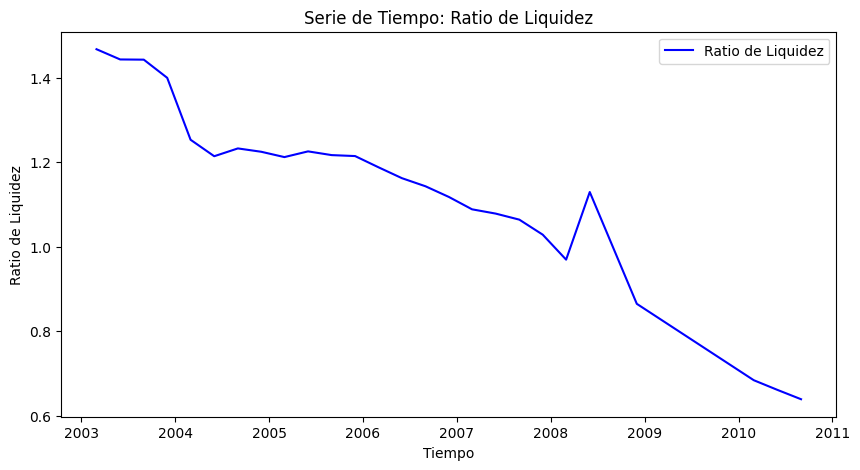

<Figure size 1000x500 with 0 Axes>

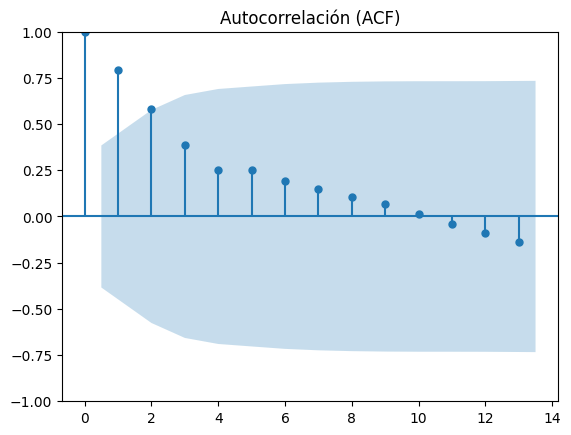

<Figure size 1000x500 with 0 Axes>

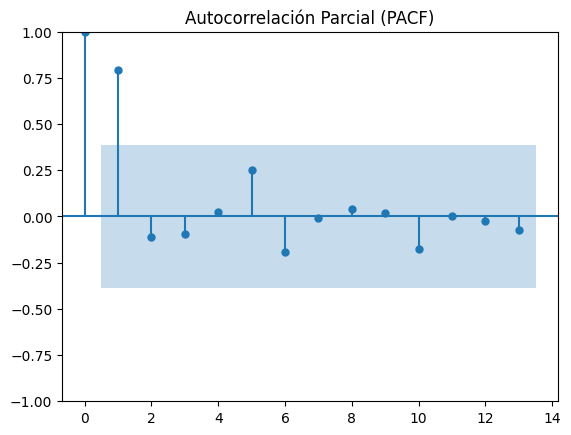

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      RATIO DE LIQUIDEZ   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  27.663
Date:                Thu, 16 Jan 2025   AIC                            -49.326
Time:                        06:38:28   BIC                            -45.670
Sample:                             0   HQIC                           -48.312
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5399      3.140     -0.172      0.863      -6.693       5.614
ma.L1          0.6639      2.955      0.225      0.822      -5.127       6.455
sigma2         0.0064      0.001      4.352      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


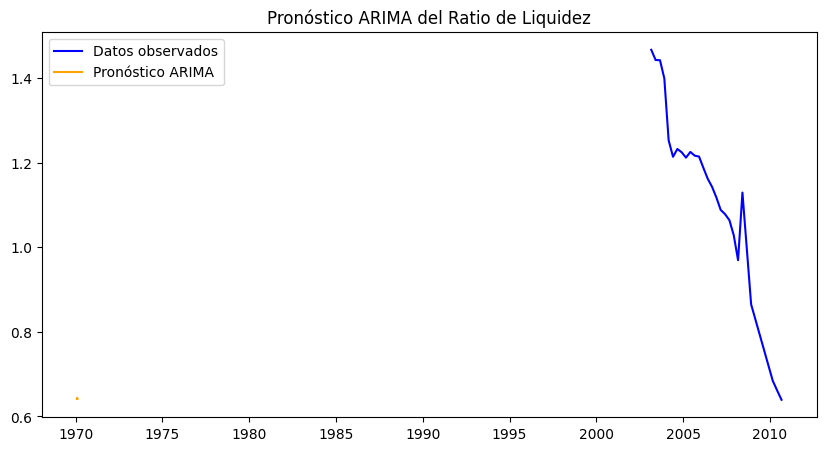

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04742. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:      RATIO DE LIQUIDEZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                20.1708
Distribution:                  Normal   AIC:                          -32.3416
Method:            Maximum Likelihood   BIC:                          -27.3092
                                        No. Observations:                   26
Date:                Thu, Jan 16 2025   Df Residuals:                       25
Time:                        06:38:28   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.2175  4.275e-03    284.764      0.000 [  1.209,  1.22

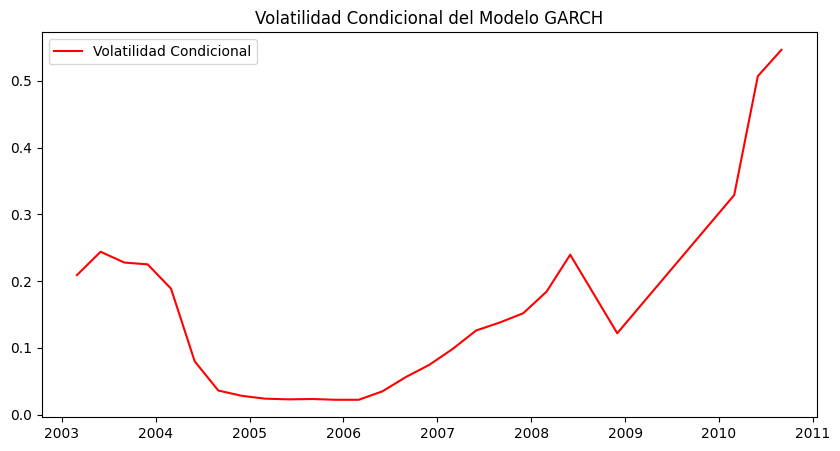

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04742. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:      RATIO DE LIQUIDEZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                19.5320
Distribution:                  Normal   AIC:                          -33.0641
Method:            Maximum Likelihood   BIC:                          -29.2898
                                        No. Observations:                   26
Date:                Thu, Jan 16 2025   Df Residuals:                       25
Time:                        06:38:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.2223  3.845e-03    317.927      0.000 [  1.215,  1.23

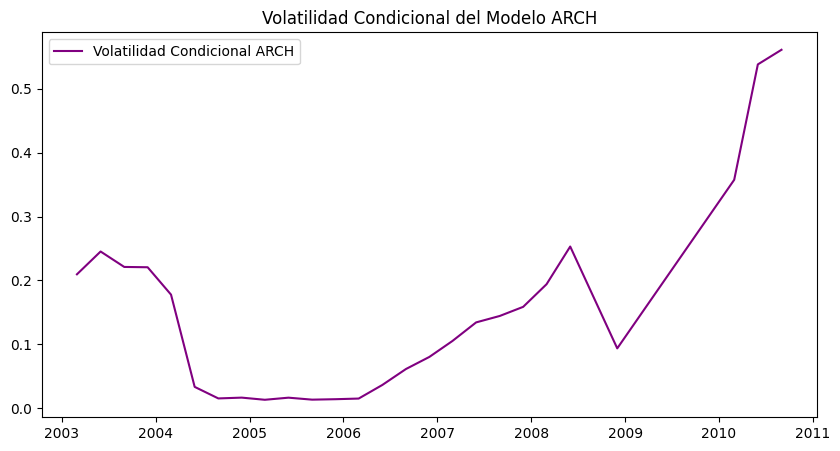

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ruta del archivo Excel
file_path = 'Mujer Empresarial.xlsx'  # Cambia esto por la ruta a tu archivo Excel

# Cargar el archivo Excel
# Asegúrate de especificar correctamente el nombre de la hoja, si es necesario
data = pd.read_excel(file_path, sheet_name='MUJER EMPRESARIA')

# Mostrar las columnas para verificar los encabezados
print("Columnas del archivo:", data.columns)

# Limpieza de los encabezados (elimina espacios extra)
data.columns = data.columns.str.strip()

# Verificar si la columna 'PERIODO' existe y corregir
if 'PERIODO' not in data.columns:
    print("La columna 'PERIODO' no está en los datos. Por favor, verifica el archivo.")
else:
    # Convertir 'PERIODO' a formato de fecha
    data['PERIODO'] = pd.to_datetime(data['PERIODO'], format='%Y%m', errors='coerce')
    data.set_index('PERIODO', inplace=True)

    # Seleccionar la variable dependiente: Ratio de Liquidez
    liquidity_ratio = data['RATIO DE LIQUIDEZ']

    # 1. Visualización de los datos
    plt.figure(figsize=(10, 5))
    plt.plot(liquidity_ratio, label='Ratio de Liquidez', color='blue')
    plt.title('Serie de Tiempo: Ratio de Liquidez')
    plt.xlabel('Tiempo')
    plt.ylabel('Ratio de Liquidez')
    plt.legend()
    plt.show()

    # Determinar el número máximo de lags permitido
    max_lags = min(len(liquidity_ratio) // 2, 20)

    # 2. Análisis de autocorrelación
    plt.figure(figsize=(10, 5))
    plot_acf(liquidity_ratio, lags=max_lags, title='Autocorrelación (ACF)')
    plt.show()

    plt.figure(figsize=(10, 5))
    plot_pacf(liquidity_ratio, lags=max_lags, title='Autocorrelación Parcial (PACF)')
    plt.show()

    # 3. Modelo ARIMA
    # Determinación de órdenes (p, d, q) con base en el PACF y ACF
    arima_model = ARIMA(liquidity_ratio, order=(1, 1, 1))
    arima_result = arima_model.fit()

    # Resumen del modelo ARIMA
    print(arima_result.summary())

    # Pronósticos del modelo ARIMA
    forecast_arima = arima_result.forecast(steps=12)
    plt.figure(figsize=(10, 5))
    plt.plot(liquidity_ratio, label='Datos observados', color='blue')
    plt.plot(forecast_arima, label='Pronóstico ARIMA', color='orange')
    plt.title('Pronóstico ARIMA del Ratio de Liquidez')
    plt.legend()
    plt.show()

    # 4. Modelo GARCH
    # Ajuste de un modelo GARCH(1, 1)
    garch_model = arch_model(liquidity_ratio, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')

    # Resumen del modelo GARCH
    print(garch_result.summary())

    # Pronósticos del modelo GARCH
    forecast_garch = garch_result.forecast(horizon=12)
    conditional_volatility = forecast_garch.variance.iloc[-1]

    plt.figure(figsize=(10, 5))
    plt.plot(garch_result.conditional_volatility, label='Volatilidad Condicional', color='red')
    plt.title('Volatilidad Condicional del Modelo GARCH')
    plt.legend()
    plt.show()

    # 5. Modelo ARCH
    arch_model_fit = arch_model(liquidity_ratio, vol='ARCH', p=1)
    arch_result = arch_model_fit.fit(disp='off')

    # Resumen del modelo ARCH
    print(arch_result.summary())

    # Visualización de volatilidad condicional del modelo ARCH
    plt.figure(figsize=(10, 5))
    plt.plot(arch_result.conditional_volatility, label='Volatilidad Condicional ARCH', color='purple')
    plt.title('Volatilidad Condicional del Modelo ARCH')
    plt.legend()
    plt.show()
